In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# import warnings
# warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [42]:

data = pd.read_csv('train.csv')
data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X = data.drop(columns='Outcome')
y = data['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


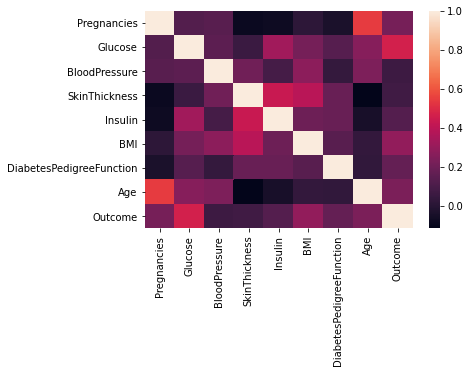

In [6]:
corr = data.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [7]:
dfTrain = data[:650]
dfTest = data[650:750]
dfCheck = data[750:]
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1).values)
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1).values)

In [8]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
accuracy = diabetesCheck.score(testData, testLabel)
y_pred_test = diabetesCheck.predict(testData)
print(metrics.classification_report(testLabel, y_pred_test))  

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        63
           1       0.74      0.62      0.68        37

    accuracy                           0.78       100
   macro avg       0.77      0.75      0.75       100
weighted avg       0.78      0.78      0.78       100



Мы можем визуализировать, как наша модель использует различные свойства и какие свойства имеют больший вес.

Text(0.5, 0, 'Importance')

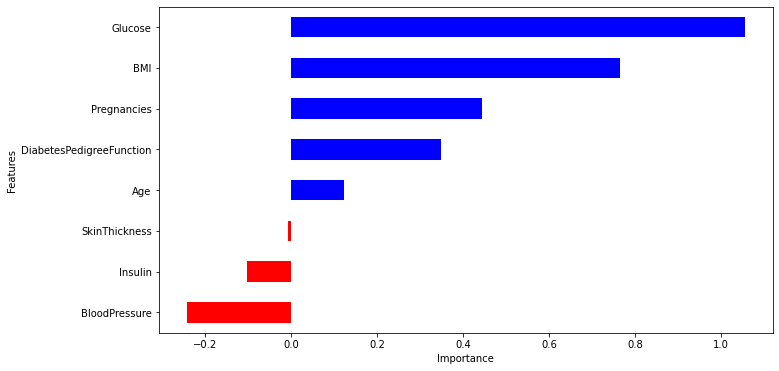

In [10]:

coeff = list(diabetesCheck.coef_[0])
labels = list(data.columns)
labels = labels[:-1]
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Создадим свою модель логистической регрессии

In [11]:

class logistic_regression():
    def __init__(self, lr, iters):        
        self.lr = lr
        self.iters = iters

    def fit(self, X, Y):
        self.X, self.Y = X.copy(), Y.copy()
        n = X.shape[0]
        self.W = np.zeros(X.shape[1])
        self.b = 0
        for i in range(self.iters):
            y_predicted = 1 / (1 + np.exp(-(np.dot(self.X, self.W) + self.b)))
            self.W -= self.lr * ((1 / n) * np.dot(X.T, y_predicted - Y))
            self.b -= self.lr * ((1 / n) * np.sum(y_predicted - Y))

    def predict(self, X):
        probabilities = np.array(1 / (1 + np.exp(-(np.dot(X, self.W) + self.b))))
        y_pred = np.where(probabilities >= 0.5, 1, 0)
        return y_pred

Теперь протестируем ее

In [12]:
def confusion_matrix(y_pred, y_test):
    d = {'true1' : [0, 0], 'true0': [0, 0]}
    conf_matrix = pd.DataFrame(d, index=['pred1', 'pred0'])
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_test[i] == 1:
            conf_matrix.loc['pred1', 'true1'] += 1
        elif y_pred[i] == 1 and y_test[i] == 0:
            conf_matrix.loc['pred1', 'true0'] += 1
        elif y_pred[i] == 0 and y_test[i] == 1:
            conf_matrix.loc['pred0', 'true1'] += 1
        elif y_pred[i] == 0 and y_test[i] == 0:
            conf_matrix.loc['pred0', 'true0'] += 1
    return conf_matrix

def classification_metrics(matrix):
    true_positive = matrix.loc['pred1', 'true1']
    false_positive = matrix.loc['pred1', 'true0']
    false_negative = matrix.loc['pred0', 'true1']
    true_negative = matrix.loc['pred0', 'true0']
    precision = true_positive / (true_positive + false_negative)
    recall = true_positive / (true_positive + false_negative)
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_negative + false_negative)
    return accuracy, precision, recall

params = [
    (0.001, 5000),
    (0.001, 10000),
    (0.001, 15000),
    (0.001, 20000),
    (0.0001, 10000)
]

for lr_iters in params:
    learningrate, iterations = lr_iters
    my_log_regr = logistic_regression(lr=learningrate, iters=iterations)
    my_log_regr.fit(trainData, trainLabel)
    y_pred_test = my_log_regr.predict(testData)
    y_pred_train = my_log_regr.predict(trainData)
    train_acc = np.mean(trainLabel == y_pred_train)
    test_acc = np.mean(testLabel == y_pred_test)
    print(metrics.classification_report(testLabel, y_pred_test))  

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        63
           1       0.71      0.65      0.68        37

    accuracy                           0.77       100
   macro avg       0.75      0.74      0.75       100
weighted avg       0.77      0.77      0.77       100

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        63
           1       0.72      0.62      0.67        37

    accuracy                           0.77       100
   macro avg       0.76      0.74      0.75       100
weighted avg       0.77      0.77      0.77       100

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        63
           1       0.72      0.62      0.67        37

    accuracy                           0.77       100
   macro avg       0.76      0.74      0.75       100
weighted avg       0.77      0.77      0.77       100

              preci

Перейдем к решению задачи через Дерево Решений

In [13]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier = classifier.fit(trainData, trainLabel)
# predict
y_pred = classifier.predict(testData)
print(metrics.classification_report(testLabel, y_pred))  

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        63
           1       0.58      0.57      0.58        37

    accuracy                           0.69       100
   macro avg       0.67      0.66      0.67       100
weighted avg       0.69      0.69      0.69       100



Теперь напишем свою реализацию Дерева Решений

In [14]:
class Node():
    def __init__(
            self, 
            feature_index=None, 
            threshold=None, left=None,
            right=None, 
            info_gain=None, 
            value=None):

        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class decision_tree():
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, data, curr_depth=0):
        X, Y = data[:,:-1], data[:,-1]
        num_samples, num_features = np.shape(X)
        
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(data, num_samples, num_features)
            
            if best_split['info_gain'] > 0:
                left_subtree = self.build_tree(best_split['data_left'], curr_depth + 1)
                right_subtree = self.build_tree(best_split['data_right'], curr_depth + 1)
                return Node(best_split['feature_index'], best_split['threshold'], left_subtree, right_subtree, best_split['info_gain'])
        
        leaf_value = max(list(Y), key=list(Y).count)
        return Node(value=leaf_value)
    
    def get_best_split(self, data, num_samples, num_features):
        best_split = {}
        max_info_gain = -float('inf')
        
        for feature_index in range(num_features):
            feature_values = data[:, feature_index]
            for threshold in np.unique(feature_values):
                data_left, data_right = self.split(data, feature_index, threshold)
                if len(data_left) > 0 and len(data_right) > 0:
                    y, left_y, right_y = data[:, -1], data_left[:, -1], data_right[:, -1]
                    curr_info_gain = self.info_gain(y, left_y, right_y)
                    
                    if curr_info_gain > max_info_gain:
                        best_split['feature_index'] = feature_index
                        best_split['threshold'] = threshold
                        best_split['data_left'] = data_left
                        best_split['data_right'] = data_right
                        best_split['info_gain'] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split
    

    def split(self, data, i, border):
        data_left = np.array([row for row in data if row[i] <= border])
        data_right = np.array([row for row in data if row[i] > border])
        return data_left, data_right
    
    def info_gain(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        return self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for c in class_labels:
            p = len(y[y == c]) / len(y)
            entropy += -p * np.log2(p)
        return entropy

    def fit(self, X, Y):
        self.root = self.build_tree(np.concatenate((X, Y), axis=1))
    
    def predict(self, X):
        return [self.prediction(x, self.root) for x in X]

    def prediction(self, x, tree):
        if tree.value != None: 
            return tree.value
        else:
            feature_val = x[tree.feature_index]
            if feature_val<=tree.threshold:
                return self.prediction(x, tree.left)
            else:
                return self.prediction(x, tree.right)

In [16]:
params = [
    (2, 1),
    (2, 2),
    (2, 3),
    (2, 4),
    (3, 1),
    (3, 2),
    (3, 3),
    (3, 4),
    (4, 1),
    (4, 2),
    (4, 3),
    (4, 4)
]

for split_depth in params:
    min_samples_split, max_depth = split_depth
    mytree = decision_tree(min_samples_split, max_depth)
    mytree.fit(pd.DataFrame(trainData), pd.DataFrame(trainLabel))
    train_acc = np.mean(mytree.predict(trainData) == trainLabel)
    test_acc = np.mean(mytree.predict(testData) == testLabel)
    print([min_samples_split, max_depth, train_acc, test_acc])

[2, 1, 0.7723076923076924, 0.76]
[2, 2, 0.7784615384615384, 0.76]
[2, 3, 0.7846153846153846, 0.76]
[2, 4, 0.8369230769230769, 0.73]
[3, 1, 0.7723076923076924, 0.76]
[3, 2, 0.7784615384615384, 0.76]
[3, 3, 0.7846153846153846, 0.76]
[3, 4, 0.8369230769230769, 0.73]
[4, 1, 0.7723076923076924, 0.76]
[4, 2, 0.7784615384615384, 0.76]
[4, 3, 0.7846153846153846, 0.76]
[4, 4, 0.8369230769230769, 0.73]


Как видно, мы можем добиться точности в 76 процентов

In [46]:
class SVM_implementation:
    def __init__(self, lr, lambda_, iters):
        self.lr = lr
        self.lambda_ = lambda_
        self.iters = iters

    def fit(self, X_train, y_train):
        n = X_train.shape[0]
        self.W = np.zeros(X.shape[1])
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)

        for i in range(self.iters):
            for j, x in enumerate(X_train):
                if y_[j] * ((x @ self.W) - self.b) >= 1:
                    self.W -= self.lr * (2 * self.lambda_ * self.W)
                else:
                    self.W -= self.lr * (2 * self.lambda_ * self.W - np.dot(x,y_[j]))
                    self.b -= self.lr * y_[j]

    def predict(self, X):
        res = np.dot(X, self.W) - self.b
        y_pred = np.where(res >= 0, 1, 0)
        return y_pred




In [47]:
params = [
    (0.01, 0.01, 5000),
    (0.001, 0.01, 1000),
    (0.001, 0.01, 3000),
    (0.001, 0.01, 5000),
    (0.0001, 0.01, 3000),
    (0.0001, 0.01, 5000),
]

for lr_lambda_iters in params:
    lr, lambda_, iters = lr_lambda_iters
    my_svm = SVM_implementation(lr=lr, lambda_=lambda_, iters=iters)
    my_svm.fit(trainData, trainLabel)
    y_pred_train = my_svm.predict(trainData)
    y_pred_test = my_svm.predict(testData)
    print(metrics.classification_report(testLabel, y_pred_test)) 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        63
           1       0.74      0.62      0.68        37

    accuracy                           0.78       100
   macro avg       0.77      0.75      0.75       100
weighted avg       0.78      0.78      0.78       100

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        63
           1       0.69      0.54      0.61        37

    accuracy                           0.74       100
   macro avg       0.73      0.70      0.71       100
weighted avg       0.73      0.74      0.73       100

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        63
           1       0.69      0.54      0.61        37

    accuracy                           0.74       100
   macro avg       0.73      0.70      0.71       100
weighted avg       0.73      0.74      0.73       100

              preci

In [ ]:
Мы видим, что точность составила 78 процентов. Теперь опробуем встроенный

In [48]:
from sklearn.svm import SVC

sklearn_svm_model = SVC()
sklearn_svm_model.fit(trainData, trainLabel)
y_pred = sklearn_svm_model.predict(testData)
print(metrics.classification_report(testLabel, y_pred)) 

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        63
           1       0.73      0.51      0.60        37

    accuracy                           0.75       100
   macro avg       0.74      0.70      0.71       100
weighted avg       0.75      0.75      0.74       100



Мы видим, что своя реализация является эффективней